# Chapter 4 --- Linear Regression

In [78]:
import numpy as np

import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    


In [79]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

Saving figure generated_data_plot


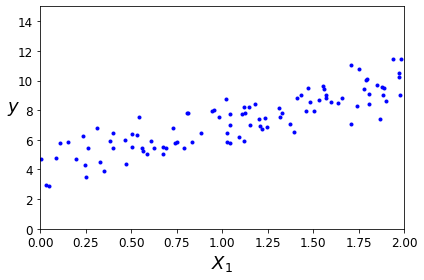

In [80]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()

In [81]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.17795097],
       [2.87092976]])

In [82]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17795097],
       [9.91981048]])

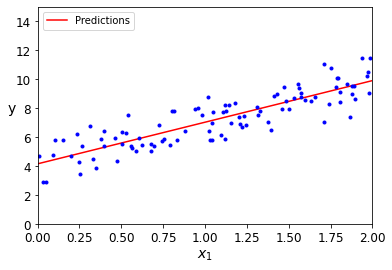

In [83]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("$x_1$")
plt.ylabel("y", rotation=0)
plt.legend(loc="upper left")
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17795097]), array([[2.87092976]]))

In [85]:
lin_reg.predict(X_new)

array([[4.17795097],
       [9.91981048]])

In [86]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.17795097],
       [2.87092976]])

In [87]:
np.linalg.pinv(X_b).dot(y)

array([[4.17795097],
       [2.87092976]])

## Linear regression with gradient descent

### Batch gradient descent

In [88]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

In [89]:
theta

array([[1.0185733 ],
       [0.29114431]])

In [90]:
np.random.randn(2)

array([-0.41615186,  0.4108492 ])

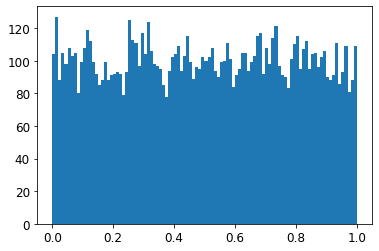

In [91]:
rand_nums = np.random.rand(10000)
plt.hist(rand_nums, bins = 100)
plt.show()

In [92]:
theta_path_bgd = []

In [93]:
for iterationin in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

In [94]:
theta

array([[4.17795097],
       [2.87092976]])

### Stochastic gradient descent

In [95]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [96]:
n_epochs = 50
t_0, t_1 = 5, 50

def learning_schedule(t):
    return t_0 / (t + t_1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta* gradients
        theta_path_sgd.append(theta)

In [97]:
theta

array([[4.22904678],
       [2.85794702]])

In [98]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [99]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10791012]), array([2.81760714]))

In [100]:
print("Shape of y raveled: ", y.ravel().shape)
print("Shape of y: ", y.shape)

Shape of y raveled:  (100,)
Shape of y:  (100, 1)


### Mini-batch

In [101]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [102]:
theta

array([[4.15518825],
       [2.86894633]])

### Compare the methods

In [103]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


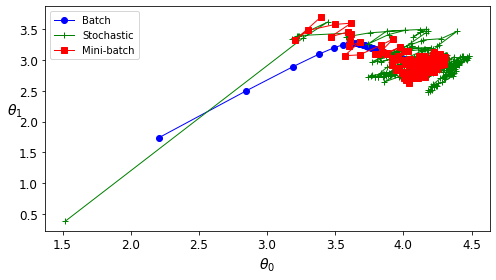

In [110]:
plt.figure(figsize=(7,4))
for theta_path, style, name in zip([theta_path_bgd, theta_path_sgd, theta_path_mgd], 
                                   ['b-o', 'g-+', 'r-s'], ['Batch', 'Stochastic', 'Mini-batch']):
    plt.plot(theta_path[:,0], theta_path[:,1], style,  linewidth=1, label=name)
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

In [172]:
np.random.seed(42)

In [173]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

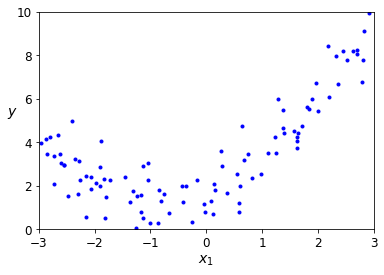

In [174]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3,0, 10])
plt.show()

In [175]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [176]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

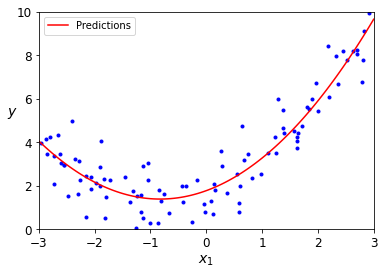

In [177]:
X_new=np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()


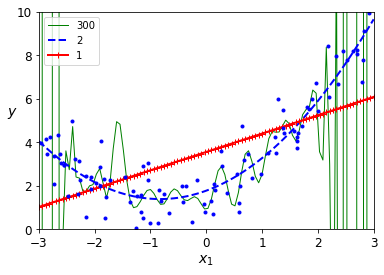

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1,300), ("b--",2,2), ("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_reg.fit(X, y)
    y_newbig = polynomial_reg.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.axis([-3,3,0,10])
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.show()


In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(val_errors), "b-", label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

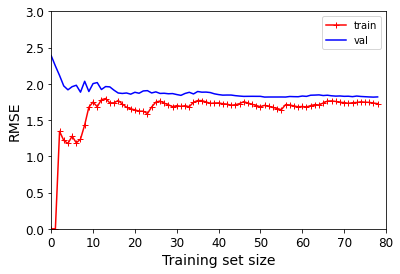

In [180]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0,80,0,3])
plt.show()

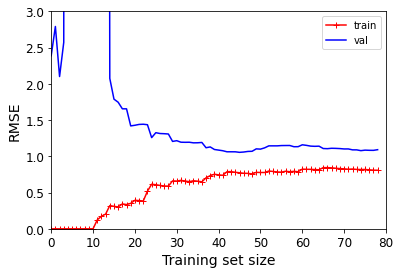

In [181]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curve(polynomial_reg, X, y)
plt.axis([0,80,0,3])
plt.show()

## Regularized Models

In [182]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + .5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
